## 1.Présentation des données¶


Le dataset est issu d’un système de partage de vélos en libre-service, il représente le nombre de locations de vélos par heure pour les utilisateurs avec et sans abonnements. Les enregistrements ont été effectués entre 2011 et 2012, avec des précisions pour chaque jour d’enregistrement avec données météorologiques ainsi qu’une précision si c’était un jour férié ou travaillé. Ci-dessous une description des différents champs de l’ensemble des données : 

• Datetime : la date d’enregistrement avec l'heure exacte qui comporte Heure, minutes et secondes.


• season : une variable catégorielle qui précise la saison : 1-hiver, 2-printemps, 3-été, 4-automne. 

• holiday : si c’est jour férié 1 sinon 0.


• Workingday : 1 si c’est un jour ouvrable, sinon 0 si c’était un week-end ou un jour férié. 


• Weather : c’est une variable catégorielle qui précise la condition météorologique, cette variable prend 4 valeurs.


• Temp :la température en Celsius 

• atemp : la température ressentie, exprimée en Celsius également. 

• Humidity : le taux d’humidité.

• Windspeed : la vitesse du vent

• casual : le nombre de locations effectuées par des utilisateurs non abonnés. 

• Registered : le nombre de locations effectuées par des utilisateurs abonnés au service.

• Count : c’est le nombre de locations total, qui est la somme des deux variables précédentes.




In [3]:
import sys
print(sys.executable)
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install xgboost
!{sys.executable} -m pip install pickle
!{sys.executable} -m pip install xgboost
!{sys.executable} -m pip install DateTime


/usr/bin/python3
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
ERROR: unknown command "pandas_profiling"


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle
from datetime import date
from datetime import datetime
import calendar
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_squared_log_error, make_scorer
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import pandas_profiling as pp

In [3]:
#Lire le fichier des enregistrements

data=pd.read_csv('data.csv')
print(data.head())

#Vérifier si le jeu de données contient des valeurs nuls
print(data.isnull().sum())
data


   Unnamed: 0             datetime  season  holiday  workingday  weather  \
0           0  2011-01-01 00:00:00       1        0           0        1   
1           1  2011-01-01 01:00:00       1        0           0        1   
2           2  2011-01-01 02:00:00       1        0           0        1   
3           3  2011-01-01 03:00:00       1        0           0        1   
4           4  2011-01-01 04:00:00       1        0           0        1   

   temp   atemp  humidity  windspeed  casual  registered  count  
0  9.84  14.395        81        0.0       3          13     16  
1  9.02  13.635        80        0.0       8          32     40  
2  9.02  13.635        80        0.0       5          27     32  
3  9.84  14.395        75        0.0       3          10     13  
4  9.84  14.395        75        0.0       0           1      1  
Unnamed: 0    0
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
win

Unnamed: 0             datetime  season  holiday  workingday  weather  \
0               0  2011-01-01 00:00:00       1        0           0        1   
1               1  2011-01-01 01:00:00       1        0           0        1   
2               2  2011-01-01 02:00:00       1        0           0        1   
3               3  2011-01-01 03:00:00       1        0           0        1   
4               4  2011-01-01 04:00:00       1        0           0        1   
...           ...                  ...     ...      ...         ...      ...   
10881       10881  2012-12-19 19:00:00       4        0           1        1   
10882       10882  2012-12-19 20:00:00       4        0           1        1   
10883       10883  2012-12-19 21:00:00       4        0           1        1   
10884       10884  2012-12-19 22:00:00       4        0           1        1   
10885       10885  2012-12-19 23:00:00       4        0           1        1   

        temp   atemp  humidity  windspeed  casual  registered  count  
0       9.84  14.395        81     0.0000       3          13     16  
1       9.02  13.635        80     0.0000       8          32     40  
2       9.02  13.635        80     0.0000       5          27     32  
3       9.84  14.395        75     0.0000       3          10     13  
4       9.84  14.395        75     0.0000       0           1      1  
...      ...     ...       ...        ...     ...         ...    ...  
10881  15.58  19.695        50    26.0027       7         329    336  
10882  14.76  17.425        57    15.0013      10         231    241  
10883  13.94  15.910        61    15.0013       4         164    168  
10884  13.94  17.425        61     6.0032      12         117    129  
10885  13.12  16.665        66     8.9981       4          84     88  

[10886 rows x 13 columns]

<AxesSubplot:xlabel='count', ylabel='Count'>

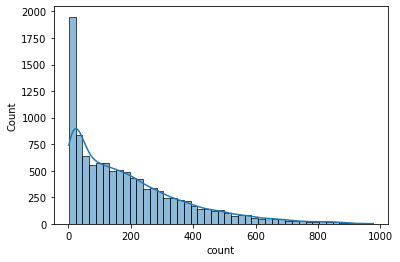

In [4]:

#Distribution des valeurs de la variable à prédire
sns.histplot(data=data, x="count", kde=True)


In [5]:
profile = pp.ProfileReport(data)
profile.to_file("profile.html") 
profile

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

###  1.1 Analyse de l’utilisation du système de location par rapport à des informations temporelle :

La location et le besoin de se déplacer est très lié à la notion du temps jour/heure, dans le but de réaliser une analyse bien détaillée, on utilisera le champ datetime qui représente un objet datatime sous la forme : "année-mois-jour Heure-minute-seconde" pour extraire le mois, jour et heure, cette segmentation nous permettra de mieux analyser les habitudes des utilisateurs.


In [35]:
from datetime import datetime

data['date'] = data['datetime'].apply(lambda x: x.split()[0]) # Make date feature
data['year'] = data['datetime'].apply(lambda x: x.split()[0].split('-')[0]) # Make year feature
data['month'] = data['datetime'].apply(lambda x: x.split()[0].split('-')[1]) # Make month feature
data['day'] = data['datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').weekday()) # Make day feature
data['hour'] = data['datetime'].apply(lambda x: x.split()[1].split(':')[0]) # Make hour feature
data['minute'] = data['datetime'].apply(lambda x: x.split()[1].split(':')[1]) # Make minute feature
data['second'] = data['datetime'].apply(lambda x: x.split()[1].split(':')[2]) # Make second feature
data["dayOfWeek"]=data['datetime'].apply(lambda x: calendar.day_name[datetime.strptime(x, '%Y-%m-%d %H:%M:%S').weekday()]) # Make date feature

print(data.head())

   Unnamed: 0             datetime  season  holiday  workingday  weather  \
0           0  2011-01-01 00:00:00       1        0           0        1   
1           1  2011-01-01 01:00:00       1        0           0        1   
2           2  2011-01-01 02:00:00       1        0           0        1   
3           3  2011-01-01 03:00:00       1        0           0        1   
4           4  2011-01-01 04:00:00       1        0           0        1   

   temp   atemp  humidity  windspeed  ...  registered  count        date  \
0  9.84  14.395        81        0.0  ...          13     16  2011-01-01   
1  9.02  13.635        80        0.0  ...          32     40  2011-01-01   
2  9.02  13.635        80        0.0  ...          27     32  2011-01-01   
3  9.84  14.395        75        0.0  ...          10     13  2011-01-01   
4  9.84  14.395        75        0.0  ...           1      1  2011-01-01   

   year month day  hour minute second dayOfWeek  
0  2011    01   5    00     00     0

In [36]:
#Convertir les différentes variables

data[['year', 'hour','minute','second']] = data[['year', 'hour','minute','second']].apply(pd.to_numeric)

data['season']=data.season.astype('category') 

data['month']=data.month.astype('category')
data['holiday']=data.holiday.astype('category')
data['day']=data.day.astype('category')
data['workingday']=data.workingday.astype('category')
data['weather']=data.weather.astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  10886 non-null  int64   
 1   datetime    10886 non-null  object  
 2   season      10886 non-null  category
 3   holiday     10886 non-null  category
 4   workingday  10886 non-null  category
 5   weather     10886 non-null  category
 6   temp        10886 non-null  float64 
 7   atemp       10886 non-null  float64 
 8   humidity    10886 non-null  int64   
 9   windspeed   10886 non-null  float64 
 10  casual      10886 non-null  int64   
 11  registered  10886 non-null  int64   
 12  count       10886 non-null  int64   
 13  date        10886 non-null  object  
 14  year        10886 non-null  int64   
 15  month       10886 non-null  category
 16  day         10886 non-null  category
 17  hour        10886 non-null  int64   
 18  minute      10886 non-null  int64   
 19  seco

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  after removing the cwd from sys.path.


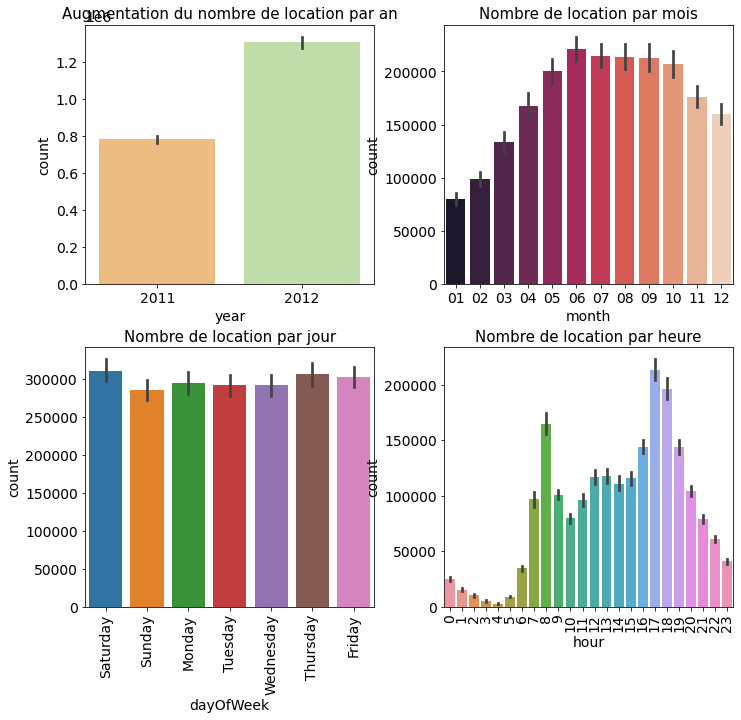

In [37]:

mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15)
figure, axes = plt.subplots(nrows=2, ncols=2) 
plt.tight_layout(0.1) 
figure.set_size_inches(10, 9) 


sns.barplot(x='year', y='count', data=data,estimator=sum,palette="Spectral", ax=axes[0, 0])
sns.barplot(x='month', y='count', data=data,estimator=sum, palette="rocket",ax=axes[0, 1])
sns.barplot(x='dayOfWeek', y='count', estimator=sum, data=data, ax=axes[1, 0])
sns.barplot(x='hour', y='count',estimator=sum, data=data, ax=axes[1, 1])


axes[0, 0].set(title='Augmentation du nombre de location par an')
axes[0, 1].set(title='Nombre de location par mois')
axes[1, 0].set(title='Nombre de location par jour')
axes[1, 1].set(title='Nombre de location par heure')

axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)




In [38]:
count_2011=data[data['year'] == 2011]['count'].sum()
count_2012=data[data['year'] == 2012]['count'].sum()


print (f"le taux d'augmentation annuelle est de : {((count_2012 - count_2011) / count_2011)*100} % ",)

le taux d'augmentation annuelle est de : 66.6920722935015 % 


([<matplotlib.axis.XTick at 0x7fccb957fc18>,
 [Text(0, 0, 'hiver'),
  Text(1, 0, 'printemps'),
  Text(2, 0, 'été'),
  Text(3, 0, 'automne')])

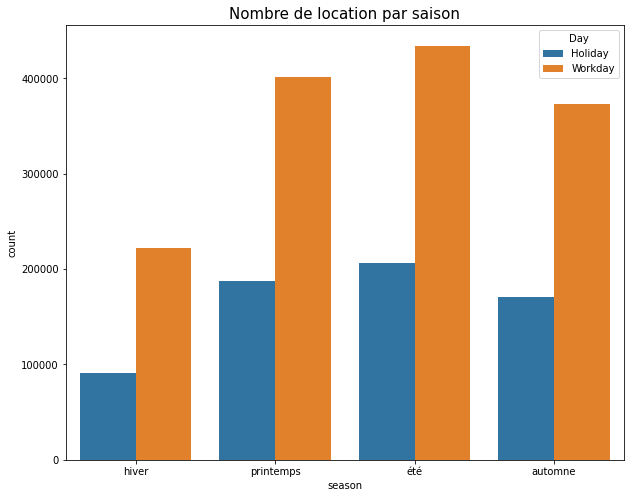

In [78]:
# Season-wise holiday bike count
plt.figure(figsize=(10,8)) # set figure size

sns.barplot(x='season', y='count', data=data, hue='workingday', estimator=sum,ci=None) # barplot
plt.legend(title='Day',labels= ['Holiday', 'Workday']) # set legend
plt.title('Nombre de location par saison') # set title
plt.xticks(np.arange(4),['hiver', 'printemps', 'été', 'automne']) # set x-tick label


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  


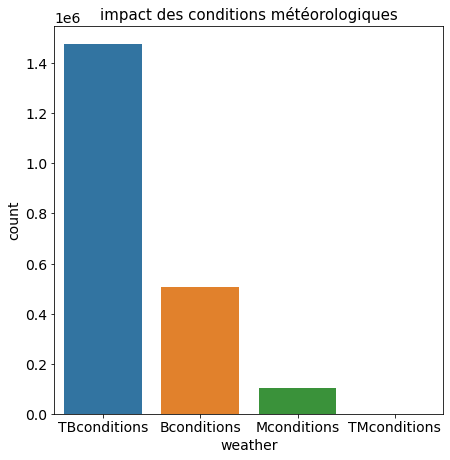

In [40]:
figure, axes = plt.subplots(nrows=1, ncols=1) 
plt.tight_layout(0.1) 
figure.set_size_inches(6, 6) 
ax = sns.barplot(x='weather',y='count',data=data, estimator=sum, ci=None)
ax.set_title("impact des conditions météorologiques") 
ax.set_xticklabels(['TBconditions', 'Bconditions', 'Mconditions',"TMconditions"]) # set x-tick labels
plt.show()

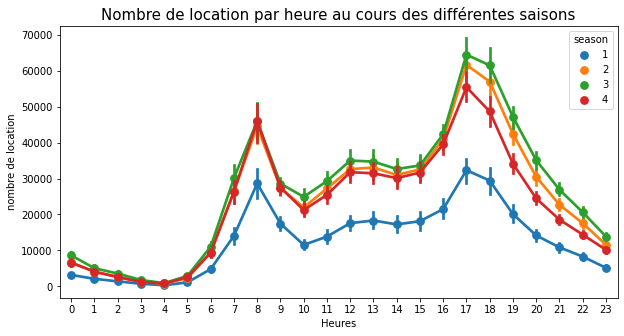

In [79]:
plt.figure(figsize=(10, 5))
sns.pointplot(x=data["hour"], y=data["count"],  estimator=sum, hue=data["season"])
plt.xlabel("Heures")
plt.ylabel("nombre de location") 
plt.title("Nombre de location par heure au cours des différentes saisons")
plt.show()

[Text(0.5, 1.0, 'Vitesse du vent et le nombre de location')]

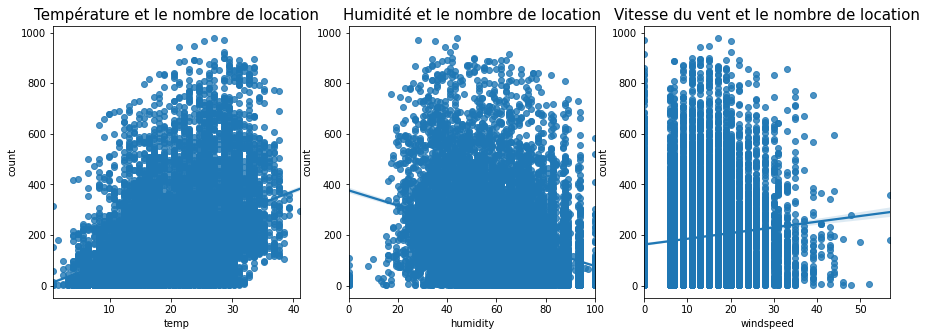

In [94]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(15,5))
sns.regplot(x=data['temp'], y=data['count'], ax=ax1 )
ax1.set(title="Température et le nombre de location")

sns.regplot(x=data['humidity'], y=data['count'], ax=ax2)
ax2.set(title="Humidité et le nombre de location")

sns.regplot(x=data['windspeed'], y=data['count'], ax=ax3)
ax3.set(title="Vitesse du vent et le nombre de location")

#### 1.1.1 Conclusion première analyse 
- le nombre de locations effectuées a augmenté de 66.69% entre 2011 et 2012.
- l'utilisation du système de location atteint son maximum pendant les heures de pointes, et les piques sont à 8h la matinée et à 17h l'après-midi.
- le samedi on a une légère augmentation de l'utilisation du service.
- les conditions météorologiques ont un impact important sur le nombre de locations, l'utilisation augmente au fil de l'année pour atteindre son maximum entre juin et septembre et commence à baisser par la suite. Cette conclusion est confirmée par le digramme qui représente le nombre de locations par rapport à la météo, où on remarque que quand les conditions météorologiques sont très mauvaises l'utilisation des vélos est presque nulle.


### 1.2 Analyse par type d’utilisateurs : Abonnés et non abonnés

Dans cette partie, on analysera les tendances d'utilisation du système de location, par les deux types d'utilisateurs les abonnés et les non abonnés.

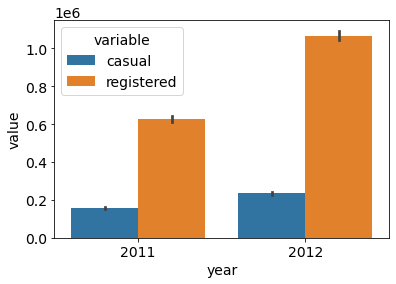

* le nombre de location par les utilisateurs non abonnés a augmenté de  : 51.66381075235693 % 
* le nombre de location par les utilisateurs abonnés a augmenté de : 70.43177324717884 % 


In [43]:
df_melted = pd.melt(data,value_vars=["casual", "registered"], id_vars=['year'])

sns.barplot(x='year', y='value',hue="variable", estimator=sum, data=df_melted )

plt.show()




casual_2011=data[data['year'] == 2011]['casual'].sum()
casual_2012=data[data['year'] == 2012]['casual'].sum()
print (f"* le nombre de location par les utilisateurs non abonnés a augmenté de  : {((casual_2012 - casual_2011) / casual_2011)*100} % ",)



registered_2011=data[data['year'] == 2011]["registered"].sum()
registered_2012=data[data['year'] == 2012]["registered"].sum()
print (f"* le nombre de location par les utilisateurs abonnés a augmenté de : {((registered_2012 - registered_2011) / registered_2011)*100} % ",)

In [44]:
#on calcule la moyenne des locations effectuées par jour pour les utilisateur abonnés et non abonnés:


moyenne_casual = data.groupby(['day'])['casual'].mean().round().astype(int) 

moyenne_registered = data.groupby(['day'])['registered'].mean().round().astype(int) 

print(f' * En moyenne on a  {moyenne_registered .sum()}  locations par les utilisateurs enregistrés par jour et  {moyenne_casual.sum()}  pour les utilisateurs non enregistrés')

 * En moyenne on a  1091  locations par les utilisateurs enregistrés par jour et  252  pour les utilisateurs non enregistrés


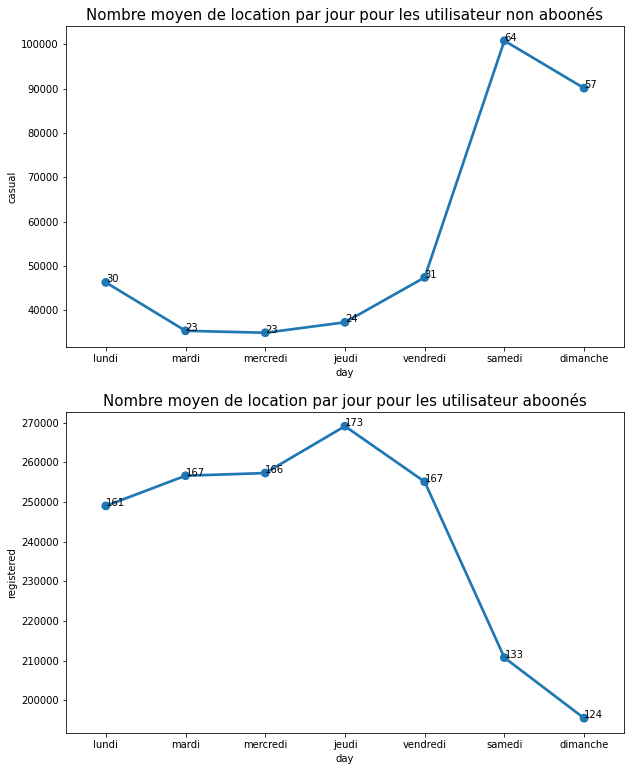

In [83]:

#Le nombre d'utilisation par jour pour les utilisateurs non abonnées 

_, ax=plt.subplots(nrows=2, ncols=1, figsize=(10,13)) 
sns.pointplot(x='day', y='casual', data=data,  estimator=sum, ci=None, ax=ax[0]) 
ax[0].set(title="Nombre moyen de location par jour pour les utilisateur non aboonés") 
ax[0].set_xticklabels(['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche']) 

for c in ax[0].collections:
    for val,of in zip(moyenne_casual,c.get_offsets()):
        ax[0].annotate(val, of)                         
        
#Le nombre d'utilisation par jour pour les utilisateurs abonnées 
sns.pointplot(x='day', y='registered', data=data,  estimator=sum, ci=None, ax=ax[1]) # set pointplot
ax[1].set(title="Nombre moyen de location par jour pour les utilisateur aboonés") # set title
ax[1].set_xticklabels(['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche']) 

for c in ax[1].collections:
    for val,of in zip(moyenne_registered,c.get_offsets()):
        ax[1].annotate(val, of)                          

In [ ]:
df_melted = pd.melt(data,value_vars=["casual", "registered"], id_vars=["month"])

sns.barplot(x='month', y='value',hue="variable", data=df_melted,  estimator=sum,  palette="pastel")

plt.show()

In [ ]:
df_melted = pd.melt(data,value_vars=["casual", "registered"], id_vars=['hour'])
sns.barplot(x='hour', y='value',hue="variable",   estimator=sum,  data=df_melted )
plt.show()

### 1.2.1 Conclusions analyse utilisateurs : 

* le nombre de location a augmenté de 70.43% pour les utilisateurs abonnés et de 51.66% pour les utilisateur non abonnées.

* les utilisateurs enregistrés font 1091 locations en moyenne par jour, contre 252 locations pour les utilisateurs non enregistrés.

* le graphe qui montre le nombre d'utilisations par type d’utilisateurs montre que les utilisateurs enregistrés utilisent le service essentiellement pendant les jours de la semaine, contrairement aux utilisateurs non enregistrés qui utilisent le service essentiellement pendant le weekend. Ceci est confirmé avec l’histogramme qui représente les nombres d'utilisation par heure et par type d'utilisateur. Le pic d'utilisation pour les utilisateurs enregistrés correspond aux heures de pointe tandis que le pic de l'utilisation pour les non abonnés est beaucoup plus important entre 11h et 17h.

* à partir des différentes analyses on peut déduire que les utilisateurs enregistrés utilisent les services de location essentiellement comme moyen de transport pour se rendre à leurs lieux de travail/études, alors que les utilisateurs non enregistrés utilisent le service essentiellement pendant les weekends et les jours fériés.



## 2. Modèles de prédictions

* Dans la première partie on va commencer par le développement d'un modèle de prédiction dans le but est de déterminer le nombre d'utilisations "count" global que ça soit par des utilisateurs enregistrés ou non.

* Dans une seconde partie on développera des modèles dont le but est de prédire le nombre d'utilisations, mais avec séparation du type d'utilisateurs "abonnés ou non", cela permettra d'avoir plus d'informations pour le coté business si l'opérateur veut faire des offres selon le type d'utilisateur.




<AxesSubplot:>

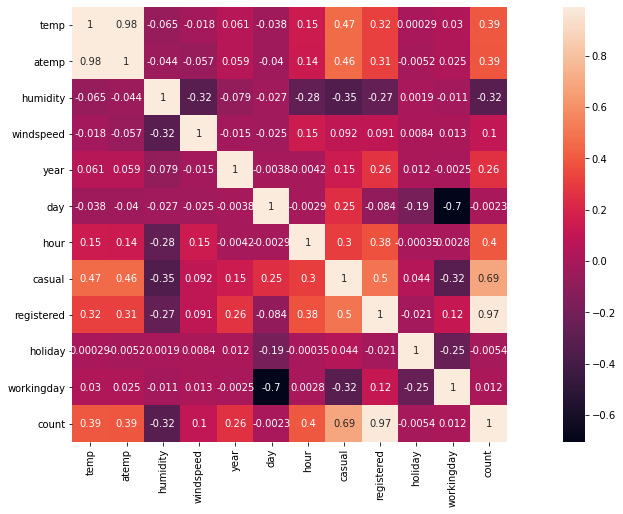

In [97]:
# Matrice de correlation

CorrMat=data[['temp','atemp','humidity','windspeed','year', 'day','hour', 'casual','registered',"holiday", "workingday", 'count']].corr()
mask=np.array(CorrMat)
mask[np.tril_indices_from(mask)]=False
#Heat map to plot the Correlation matrix
fig,ax=plt.subplots(figsize=(20,8))
sns.heatmap(CorrMat, vmax=0.99,square=True,annot=True,ax=ax)                        

* une forte correlation entre temp et atemps : on peut garder qu seule variables des deux.
* il exsite une  relation entre la temperature l'humidité ainsi que l'heure avec  le nombre de location.




In [ ]:
#Preparation des données 
data = data.drop('datetime',axis=1)
data = data.drop('date',axis=1)
data = data.drop('minute',axis=1)
data = data.drop('second',axis=1)
data = data.drop('atemp',axis=1)
data = data.drop('registered',axis=1)
data = data.drop('casual',axis=1)
data=data.drop("Unnamed: 0",axis=1)
data = data.drop('dayOfWeek',axis=1)
#print(data.head())

# encoder les variables categoriales 

categorical_features = ["season","holiday","weather_condition","weekday","month","year",'isweekend','workingday']
dummy_data=pd.get_dummies(data,columns=['season',"holiday",'workingday','weather',"month"],drop_first=False)
dummy_data.head()

In [46]:
#preparer les données d'entrainement et de test

x = dummy_data.drop(['count'],axis = 1)
y = dummy_data['count']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25 ,random_state = 2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(8164, 30) (2722, 30) (8164,) (2722,)


In [49]:
# definition de fonctions pour afficher les résultats 
 

    

def Aff_Residuals(y_test, y_pred, name):
    residuals = y_test - y_pred                    
    _, ax = plt.subplots()                         
    ax.scatter(y_test, residuals)                  
    ax.axhline()                                   
    ax.set_xlabel('Observations ')
    ax.set_ylabel('residual')
    ax.title.set_text(name[:15]+ ' residual calculé avec  RSME: ' + str(np.sqrt(mean_squared_error(y_test, y_pred))))
    plt.show()

    

def Aff_Plot(y_pred, y_test, name):
    plt.figure(figsize=(10,5))
    sns.distplot(y_pred)
    sns.distplot(y_test)
    plt.legend(['y_pred','y_test'])
    plt.title(name+'   : Comparaison des valeurs prédites par rapport à celles souhaitées ')  
    plt.show()

#### 2.1 random forest

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Fitting 3 folds for each of 960 candidates, totalling 2880 fits
R^2: 0.9391755411914127
Mean Absolute Error: 26.551946417394618
Mean Squared Error: 1999.3007518162226
Root Mean Squared Error: 44.713541034190335
rmlse: 0.33007143837847175


/home/cbensekka/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/cbensekka/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


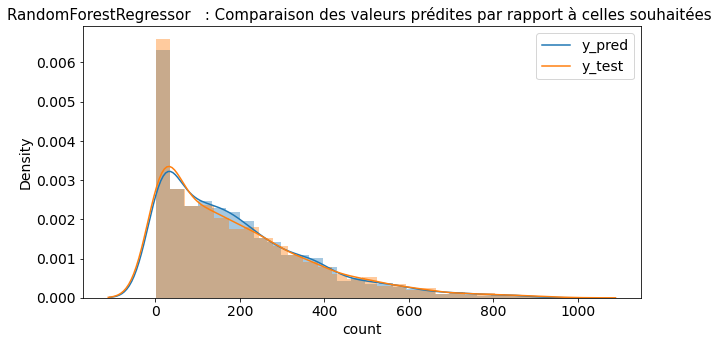

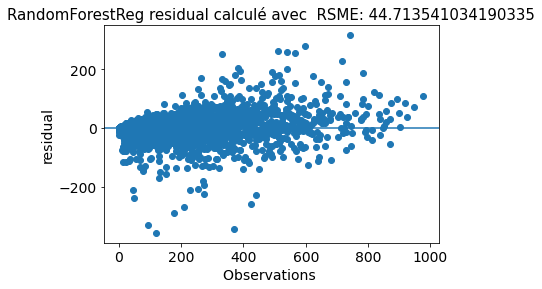

In [57]:


rf = RandomForestRegressor(random_state = 42)

print(rf.get_params())

#rf_params = {'n_estimators':np.arange(10,25,150,25,900),'max_depth':np.arange(2,5,8,12,20),'min_samples_leaf':np.arange(2,15,3)}

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 2, stop = 18, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5,]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]



param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



rf = RandomForestRegressor(random_state=0)


grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,     cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(x_train, y_train)


best_grid_rf = grid_search.best_estimator_


# sauvegarder le modèle
filename = 'RFModel.sav'
pickle.dump(best_grid_rf, open(filename, 'wb'))






y_pred=best_grid_rf.predict(x_test)




print('R^2:',best_grid_rf.score(x_test, y_test)) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('rmlse:', np.sqrt(mean_squared_log_error(y_test, y_pred)))


R2_RF=best_grid_rf.score(x_test, y_test)
Mean_Absolute_Error_rf=metrics.mean_absolute_error(y_test, y_pred)
Mean_Squared_Error_rf=metrics.mean_squared_error(y_test, y_pred)
Root_Mean_Squared_Error_rf=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#rmlse_rf=np.sqrt(mean_squared_log_error(y_test, y_pred))






Aff_Plot(best_grid_rf.predict(x_test),y_test,"RandomForestRegressor")
Aff_Residuals(y_test,best_grid_rf.predict(x_test),"RandomForestRegressor")


#### 2.2 Gradient Boosting regression

R^2: 0.9199072810652781
Mean Absolute Error: 36.78168587077556
Mean Squared Error: 2632.648712668654
Root Mean Squared Error: 51.30934332720166
rmlse: 0.7434429220676715


/home/cbensekka/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/cbensekka/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


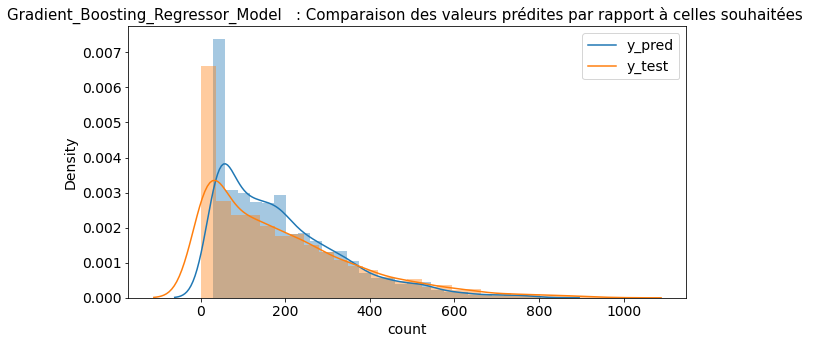

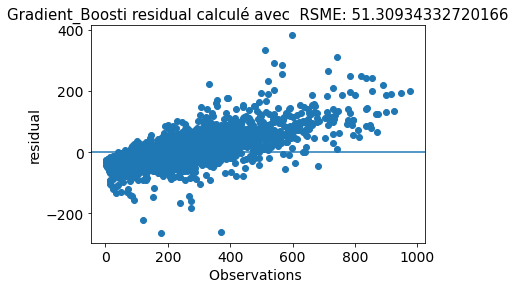

In [52]:
# pipeline builder

n_estimators = [int(x) for x in np.linspace(start = 2, stop = 18, num = 15)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]





param_grid = {
    
    'max_depth': max_depth,
    'max_features': [2, 3,4,5,8,10, 15],
    'min_samples_leaf': [1,2,3, 4, 5,20, 25, 30],
    'min_samples_split': [2,5,8, 10, 12],
    'n_estimators': n_estimators
    
}


reg = GradientBoostingRegressor()



grid_search = GridSearchCV(estimator = reg, param_grid = param_grid ,     cv = 3, n_jobs = -1, )


grid_search.fit(x_train, y_train)

best_grid_GBR = grid_search.best_estimator_


y_pred=best_grid_GBR.predict(x_test)



filename = 'GradientBoostingRegressorModel.sav'
pickle.dump(best_grid_GBR, open(filename, 'wb'))





print('R^2:',best_grid_GBR.score(x_test, y_test)) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('rmlse:', np.sqrt(mean_squared_log_error(y_test, y_pred)))






R2_GBR=best_grid_GBR.score(x_test, y_test)
Mean_Absolute_Error_GBR=metrics.mean_absolute_error(y_test, y_pred)
Mean_Squared_Error_GBR=metrics.mean_squared_error(y_test, y_pred)
Root_Mean_Squared_Error_GBR=np.sqrt(metrics.mean_squared_error(y_test, y_pred))






Aff_Plot(best_grid_GBR.predict(x_test),y_test,"Gradient_Boosting_Regressor_Model")
Aff_Residuals(y_test,best_grid_GBR.predict(x_test),"Gradient_Boosting_Regressor_Model")











#print(best_grid.feature_importances_)



 Les variables les plus importantes pour le modèle 


<AxesSubplot:>

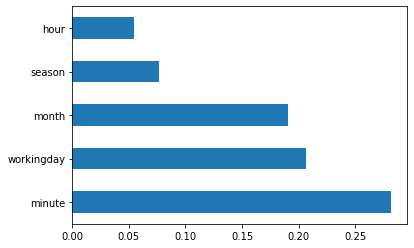

In [98]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline           

print(" Les variables les plus importantes pour le modèle ")
(pd.Series(best_grid.feature_importances_, index=x.columns)
   .nlargest(5)
   .plot(kind='barh'))


#### 2.3 XGBRegressor


In [63]:
#Preparation des données pour le mod

from datetime import datetime
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler

data=pd.read_csv('data.csv')
print(data.head())

print("ok")
data['date'] = data['datetime'].apply(lambda x: x.split()[0]) # Make date feature
data['year'] = data['datetime'].apply(lambda x: x.split()[0].split('-')[0]) # Make year feature
data['month'] = data['datetime'].apply(lambda x: x.split()[0].split('-')[1]) # Make month feature
data['day'] = data['datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').weekday()) # Make day feature
data['hour'] = data['datetime'].apply(lambda x: x.split()[1].split(':')[0]) # Make hour feature
data['minute'] = data['datetime'].apply(lambda x: x.split()[1].split(':')[1]) # Make minute feature
data['second'] = data['datetime'].apply(lambda x: x.split()[1].split(':')[2]) # Make second feature
data["dayOfWeek"]=data['datetime'].apply(lambda x: calendar.day_name[datetime.strptime(x, '%Y-%m-%d %H:%M:%S').weekday()])
data[['year','month', 'hour','minute','second']] = data[['year','month', 'hour','minute','second']].apply(pd.to_numeric)


print(data.head())

x = data.drop(['count','registered','casual','dayOfWeek', "second"  ,"date"    ,'Unnamed: 0','datetime','atemp'],axis = 1)

min_max_scaler = MinMaxScaler()



x[["season" , "holiday" , "workingday" , "weather" , "temp"  ,"humidity"  ,"windspeed" ,  "month"  ,"day"  ,"hour","year" ,'minute']] = min_max_scaler.fit_transform(x[["season" , "holiday" , "workingday" , "weather" , "temp"  ,"humidity"  ,"windspeed" ,  "month"  ,"day"  ,"hour" ,"year",'minute']] )



y = data['count']


    


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25 ,random_state = 2)

   Unnamed: 0             datetime  season  holiday  workingday  weather  \
0           0  2011-01-01 00:00:00       1        0           0        1   
1           1  2011-01-01 01:00:00       1        0           0        1   
2           2  2011-01-01 02:00:00       1        0           0        1   
3           3  2011-01-01 03:00:00       1        0           0        1   
4           4  2011-01-01 04:00:00       1        0           0        1   

   temp   atemp  humidity  windspeed  casual  registered  count  
0  9.84  14.395        81        0.0       3          13     16  
1  9.02  13.635        80        0.0       8          32     40  
2  9.02  13.635        80        0.0       5          27     32  
3  9.84  14.395        75        0.0       3          10     13  
4  9.84  14.395        75        0.0       0           1      1  
ok
   Unnamed: 0             datetime  season  holiday  workingday  weather  \
0           0  2011-01-01 00:00:00       1        0           0     

[17:30:21] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[17:30:21] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


R^2: 0.9552931848291616
Mean Absolute Error: 23.55263249286499
Mean Squared Error: 1469.5135958981498
Root Mean Squared Error: 38.334235298205044
rmlse: 0.4085619289972827


/home/cbensekka/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/cbensekka/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


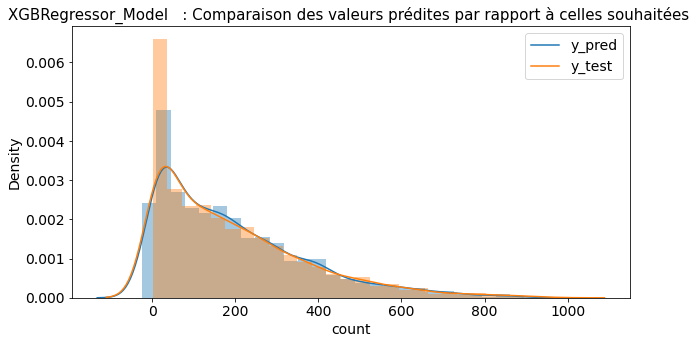

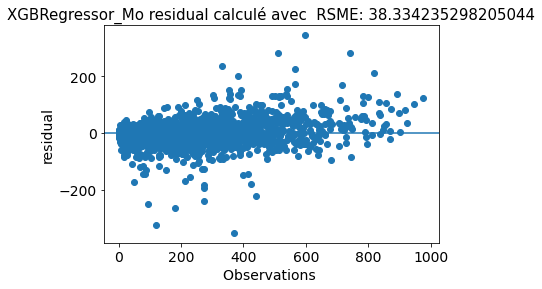

In [64]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import datetime
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_squared_log_error, make_scorer







xgb1 = XGBRegressor()
parameters = {'nthread':[4], 
              'objective':['reg:linear', 'reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}




grid_search = GridSearchCV(estimator =xgb1, param_grid = parameters ,     cv = 3, n_jobs = -1, )


grid_search.fit(x_train, y_train)

best_grid_XGBRegressor = grid_search.best_estimator_


y_pred=best_grid_XGBRegressor.predict(x_test)




# save the model to disk
filename = 'XGBRegressor.sav'
pickle.dump(best_grid_XGBRegressor, open(filename, 'wb'))





print('R^2:',best_grid_XGBRegressor.score(x_test, y_test)) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('rmlse:', np.sqrt(mean_squared_log_error(abs(y_test), abs(y_pred))))






R2_XGBRegressor=best_grid_XGBRegressor.score(x_test, y_test)
Mean_Absolute_Error_XGBRegressor=metrics.mean_absolute_error(y_test, y_pred)
Mean_Squared_Error_XGBRegressor=metrics.mean_squared_error(y_test, y_pred)
Root_Mean_Squared_Error_XGBRegressor=np.sqrt(metrics.mean_squared_error(y_test, y_pred))






Aff_Plot(best_grid_XGBRegressor.predict(x_test),y_test,"XGBRegressor_Model")
Aff_Residuals(y_test,best_grid_XGBRegressor.predict(x_test),"XGBRegressor_Model")




















In [67]:
#Metrics de comparaison 


dataMetric = [{'R^2': R2_RF , 'Mean Absolute Error': Mean_Absolute_Error_rf, 'Mean Squared Error':Mean_Squared_Error_rf},
        {'R^2': R2_GBR , 'Mean Absolute Error': Mean_Absolute_Error_GBR, 'Mean Squared Error':Mean_Squared_Error_GBR},
       {'R^2': R2_XGBRegressor , 'Mean Absolute Error': Mean_Absolute_Error_XGBRegressor, 'Mean Squared Error':Mean_Squared_Error_XGBRegressor}]



dfM = pd.DataFrame(dataMetric, index =['Randomforest','GradientBoosting','XGBRegressor'])

print(dfM)

                       R^2  Mean Absolute Error  Mean Squared Error
Randomforest      0.939176            26.551946         1999.300752
GradientBoosting  0.919907            36.781686         2632.648713
XGBRegressor      0.955293            23.552632         1469.513596


<AxesSubplot:>

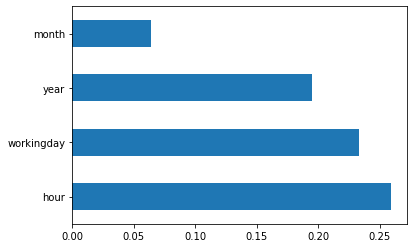

In [68]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline           


(pd.Series(best_grid_XGBRegressor.feature_importances_, index=x.columns)
   .nlargest(4)
   .plot(kind='barh'))   

#### 2.4 Modèle pour prédire le nombre de location par les utilisateurs abonnés


In [6]:
#Preparation des données pour le mod

from datetime import datetime
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler

data=pd.read_csv('data.csv')
print(data.head())

print("ok")
data['date'] = data['datetime'].apply(lambda x: x.split()[0]) # Make date feature
data['year'] = data['datetime'].apply(lambda x: x.split()[0].split('-')[0]) # Make year feature
data['month'] = data['datetime'].apply(lambda x: x.split()[0].split('-')[1]) # Make month feature
data['day'] = data['datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').weekday()) # Make day feature
data['hour'] = data['datetime'].apply(lambda x: x.split()[1].split(':')[0]) # Make hour feature
data['minute'] = data['datetime'].apply(lambda x: x.split()[1].split(':')[1]) # Make minute feature
data['second'] = data['datetime'].apply(lambda x: x.split()[1].split(':')[2]) # Make second feature
data["dayOfWeek"]=data['datetime'].apply(lambda x: calendar.day_name[datetime.strptime(x, '%Y-%m-%d %H:%M:%S').weekday()])
data[['year','month', 'hour','minute','second']] = data[['year','month', 'hour','minute','second']].apply(pd.to_numeric)


print(data.head())

x = data.drop(['count','registered','casual','dayOfWeek', "second"  ,"date"    ,'Unnamed: 0','datetime','atemp','year'],axis = 1)

min_max_scaler = MinMaxScaler()
x[["season" , "holiday" , "workingday" , "weather" , "temp"  ,"humidity"  ,"windspeed" ,  "month"  ,"day"  ,"hour" ,'minute']] = min_max_scaler.fit_transform(x[["season" , "holiday" , "workingday" , "weather" , "temp"  ,"humidity"  ,"windspeed" ,  "month"  ,"day"  ,"hour" ,'minute']] )
y = data['registered']



x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25 ,random_state = 2)

   Unnamed: 0             datetime  season  holiday  workingday  weather  \
0           0  2011-01-01 00:00:00       1        0           0        1   
1           1  2011-01-01 01:00:00       1        0           0        1   
2           2  2011-01-01 02:00:00       1        0           0        1   
3           3  2011-01-01 03:00:00       1        0           0        1   
4           4  2011-01-01 04:00:00       1        0           0        1   

   temp   atemp  humidity  windspeed  casual  registered  count  
0  9.84  14.395        81        0.0       3          13     16  
1  9.02  13.635        80        0.0       8          32     40  
2  9.02  13.635        80        0.0       5          27     32  
3  9.84  14.395        75        0.0       3          10     13  
4  9.84  14.395        75        0.0       0           1      1  
ok
   Unnamed: 0             datetime  season  holiday  workingday  weather  \
0           0  2011-01-01 00:00:00       1        0           0     

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import datetime
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_squared_log_error, make_scorer






# Make date feature

# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear', 'reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}




grid_search = GridSearchCV(estimator =xgb1, param_grid = parameters ,     cv = 3, n_jobs = -1, )


grid_search.fit(x_train, y_train)

best_grid_XGBRegressor = grid_search.best_estimator_


y_pred=best_grid_XGBRegressor.predict(x_test)




# save the model to disk
filename = 'XGBRegressor.sav'
pickle.dump(best_grid_XGBRegressor, open(filename, 'wb'))





print('R^2:',best_grid_XGBRegressor.score(x_test, y_test)) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('rmlse:', np.sqrt(mean_squared_log_error(abs(y_test), abs(y_pred))))






R2_XGBRegressor=best_grid_XGBRegressor.score(x_test, y_test)
Mean_Absolute_Error_XGBRegressor=metrics.mean_absolute_error(y_test, y_pred)
Mean_Squared_Error_XGBRegressor=metrics.mean_squared_error(y_test, y_pred)
Root_Mean_Squared_Error_XGBRegressor=np.sqrt(metrics.mean_squared_error(y_test, y_pred))






Aff_Plot(best_grid_XGBRegressor.predict(x_test),y_test,"XGBRegressor_Model")


<AxesSubplot:>

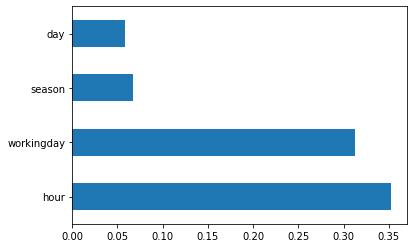

In [80]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline           


(pd.Series(best_grid_XGBRegressor.feature_importances_, index=x.columns)
   .nlargest(4)
   .plot(kind='barh'))

#### 2.5 Modèle pour prédire le nombre de location par les utilisateurs non abonnés


In [95]:
#Preparation des données pour le mod

from datetime import datetime
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler

data=pd.read_csv('data.csv')
print(data.head())

print("ok")
data['date'] = data['datetime'].apply(lambda x: x.split()[0]) # Make date feature
data['year'] = data['datetime'].apply(lambda x: x.split()[0].split('-')[0]) # Make year feature
data['month'] = data['datetime'].apply(lambda x: x.split()[0].split('-')[1]) # Make month feature
data['day'] = data['datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').weekday()) # Make day feature
data['hour'] = data['datetime'].apply(lambda x: x.split()[1].split(':')[0]) # Make hour feature
data['minute'] = data['datetime'].apply(lambda x: x.split()[1].split(':')[1]) # Make minute feature
data['second'] = data['datetime'].apply(lambda x: x.split()[1].split(':')[2]) # Make second feature
data["dayOfWeek"]=data['datetime'].apply(lambda x: calendar.day_name[datetime.strptime(x, '%Y-%m-%d %H:%M:%S').weekday()])
data[['year','month', 'hour','minute','second']] = data[['year','month', 'hour','minute','second']].apply(pd.to_numeric)


print(data.head())

x = data.drop(['count','registered','casual','dayOfWeek', "second"  ,"date"    ,'Unnamed: 0','datetime','atemp','year'],axis = 1)

min_max_scaler = MinMaxScaler()
x[["temp"  ,"season" ,  "workingday" , "weather" , "humidity"  ,"windspeed" ,  "month"  ,"day"  ,"hour" ]] = min_max_scaler.fit_transform(x[["temp"  ,"season" ,  "workingday" , "weather" , "humidity"  ,"windspeed" ,  "month"  ,"day"  ,"hour"]] )
y = data['casual']



x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25 ,random_state = 2)

   Unnamed: 0             datetime  season  holiday  workingday  weather  \
0           0  2011-01-01 00:00:00       1        0           0        1   
1           1  2011-01-01 01:00:00       1        0           0        1   
2           2  2011-01-01 02:00:00       1        0           0        1   
3           3  2011-01-01 03:00:00       1        0           0        1   
4           4  2011-01-01 04:00:00       1        0           0        1   

   temp   atemp  humidity  windspeed  casual  registered  count  
0  9.84  14.395        81        0.0       3          13     16  
1  9.02  13.635        80        0.0       8          32     40  
2  9.02  13.635        80        0.0       5          27     32  
3  9.84  14.395        75        0.0       3          10     13  
4  9.84  14.395        75        0.0       0           1      1  
ok
   Unnamed: 0             datetime  season  holiday  workingday  weather  \
0           0  2011-01-01 00:00:00       1        0           0     

[19:14:52] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[19:14:52] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


R^2: 0.9057544709363877
Mean Absolute Error: 9.621167534217102
Mean Squared Error: 247.91250516925842
Root Mean Squared Error: 15.74523753930878
rmlse: 0.5980658028539949


/home/cbensekka/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/cbensekka/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


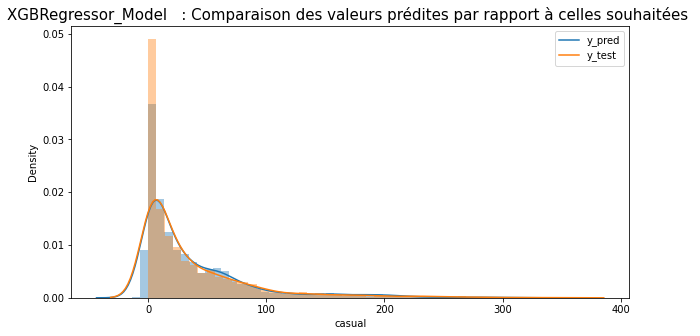

In [96]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import datetime
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_squared_log_error, make_scorer






# Make date feature

# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}




grid_search = GridSearchCV(estimator =xgb1, param_grid = parameters ,     cv = 3, n_jobs = -1, )


grid_search.fit(x_train, y_train)

best_grid_XGBRegressor = grid_search.best_estimator_


y_pred=best_grid_XGBRegressor.predict(x_test)




# save the model to disk
filename = 'XGBRegressor.sav'
pickle.dump(best_grid_XGBRegressor, open(filename, 'wb'))





print('R^2:',best_grid_XGBRegressor.score(x_test, y_test)) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('rmlse:', np.sqrt(mean_squared_log_error(abs(y_test), abs(y_pred))))






R2_XGBRegressor=best_grid_XGBRegressor.score(x_test, y_test)
Mean_Absolute_Error_XGBRegressor=metrics.mean_absolute_error(y_test, y_pred)
Mean_Squared_Error_XGBRegressor=metrics.mean_squared_error(y_test, y_pred)
Root_Mean_Squared_Error_XGBRegressor=np.sqrt(metrics.mean_squared_error(y_test, y_pred))






Aff_Plot(best_grid_XGBRegressor.predict(x_test),y_test,"XGBRegressor_Model")
#Aff_Residuals(y_test,best_grid_XGBRegressor.predict(x_test),"XGBRegressor_Model")

<AxesSubplot:>

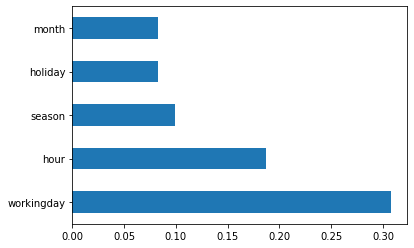

In [99]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline           


(pd.Series(best_grid_XGBRegressor.feature_importances_, index=x.columns)
   .nlargest(5)
   .plot(kind='barh'))